## ROC from dl2 files

This is an example of the simplest possible way to calcualte an ROC plot from a signal and background dl2 file

In [10]:
import numpy as np
from dl2_tools.handler import sim_datasets,observation_handler
from dl2_tools.maker import roc_maker
import pkg_resources
import matplotlib.pyplot as plt
from pyirf.spectral import CRAB_HEGRA, IRFDOC_PROTON_SPECTRUM

import os

Get the directory where the data that comes with the package is stored

In [2]:
dl2_tools_dir = pkg_resources.resource_filename("dl2_tools","")
data_dir = os.path.join(dl2_tools_dir, 'data')


Load the individual files as DataSets. The point-like gammas are stored as a PointSourceSignalSet, the diffuse protons as a BackgroundSet 

In [3]:
signal=sim_datasets.PointSourceSignalSet.from_path(os.path.join(data_dir,"dl2_files/1-2run_gamma_20deg_0deg___cta-prod6-paranal-2147m-Paranal-nshow-100000-0-LSTs-14-MSTs-0-SSTs-NSCAT_5_CSCAT_1000-nsb-0.216-GHz_off0.0..FCExt--HillasReco--RF_red_100_est_dpth_20_01_lk_cut_int_wgt--IP_NC_dummy----RFCl_100_est_dpth_20_int_wgt.dl2.h5"),reco_energy_name="RF_red_100_est_dpth_20_01_lk_cut_int_wgt",geometry_name="HillasReconstructor",gh_score_name="RFCl_100_est_dpth_20_int_wgt")
background=sim_datasets.BackgroundSet.from_path(os.path.join(data_dir,"dl2_files/360-375run_proton_20deg_0deg___cta-prod6-paranal-2147m-Paranal-nshow-1200000-0-LSTs-14-MSTs-0-SSTs-NSCAT_5_CSCAT_1000_ESLOPE_2.7_off0.0..FCExt--HillasReco--RF_red_100_est_dpth_20_01_lk_cut_int_wgt--IP_NC_dummy----RFCl_100_est_dpth_20_int_wgt.dl2.h5"),reco_energy_name="RF_red_100_est_dpth_20_01_lk_cut_int_wgt",geometry_name="HillasReconstructor",gh_score_name="RFCl_100_est_dpth_20_int_wgt")

Both of these are then passed to a PointSourceObservationHandler object

In [4]:
observation=observation_handler.PointSourceObservationHandler(signal=[signal],background=[background])

For the ROC the weights are important. We here set them according to a flux from pyirf.spectral 

In [5]:
observation.signal.reweight_to(CRAB_HEGRA)
observation.background.reweight_to(IRFDOC_PROTON_SPECTRUM)

Next we set upt the ROCMaker, which make sthe plot from the observation.

In [11]:
my_roc_maker=roc_maker.ROCMaker()
my_roc_maker.loss_vector=np.linspace(0.01,0.99,99) # Signal loss fractions to evaluate the curve at
my_roc_maker.radius_percentile=90 # The radius cut to set after g/h separation. This of course affects the purity
my_roc_maker.N_reco_energy_bins=10 # Number of bins in reconstructed energy to evaluate the gh and radius cut in

Run the roc_maker on the observation

In [12]:
my_roc_maker(observation)

And plot the ROC curve from it. The low statistics of the dataset use make it so jiggly.

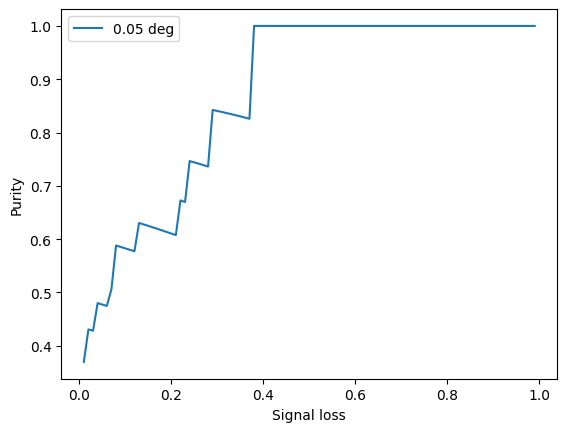

In [8]:
roc_fig, roc_ax = plt.subplots()
my_roc_maker.make_plot(roc_ax)


Finally, we can calculate the area under the curve (auc) as a measure of the quality of the g/h separation

In [9]:
my_roc_maker.integrate_auc()

array([0.86210464])